Sound velocity bound and neutron stars

Paulo Bedaque

Department of Physics, University of Maryland College Park, Maryland 20742, USA

Andrew W. Steiner

Institute for Nuclear Theory, University of Washington Seattle, Washington 98195, USA

Department of Physics and Astronomy, University of Tennessee, Knoxville, Tennessee 37996, USA and

Physics Division, Oak Ridge National Laboratory, Oak Ridge, Tennessee 37831, USA

In [1]:
import numpy as np
from astropy import units as uu
from astropy import constants as cc
var ("x", "y", "eta", "n", "n0", "eta_L", "gamma", "alpha", "alpha_L", "frac", "xx", "MN", "MP","ME", "MNE", "EK")
var ("A0",  "A", "B", "C", "T0", "K", "S", "L", "h", "mu", "c", "hbar")

(A0, A, B, C, T0, K, S, L, h, mu, c, hbar)

In [2]:

# K=235.0*uu.MeV
# B=16.0*uu.MeV
# L=50.0*uu.MeV
# S=32.0*uu.MeV
# MP= (cc.m_p*cc.c**2).to("MeV")
# MN= (cc.m_n*cc.c**2).to("MeV")
# ME= (cc.m_e*cc.c**2).to("MeV")
# pi= np.pi
# n0=0.16/uu.fm/uu.fm/uu.fm
# # n0=0.054/uu.fm**3
# hydrogenatom=cc.m_p+cc.m_e
# # T0=((3*np.pi**2*n0/2)**(2/3)*cc.hbar**2/(2*cc.m_n)).to("MeV")
# hydrogenatomwavelength = (cc.h/(hydrogenatom*cc.c)).si
# hydrogenatomwavelength, T0, K, B, L,S,MP, MN, ME



# alpha = -2*(5*B*K - 3*(4*B - K)*T0)/(5*(9*B - K)*T0 + 3*T0**2)
# eta = -18/5*(25*B**2 + 10*B*T0 + T0**2)/(5*(9*B - K)*T0 + 3*T0**2)
# gamma = 1/9*(5*K + 6*T0)/(5*B + T0)
# alpha_L= 1.2
# eta_L= 0.65


# # alpha = -2*(5*B*K - 3*(4*B - K)*T0)/(5*(9*B - K)*T0 + 3*T0**2)
# # eta = -18/5*(25*B**2 + 10*B*T0 + T0**2)/(5*(9*B - K)*T0 + 3*T0**2)
# # gamma = 1/9*(5*K + 6*T0)/(5*B + T0)
# # eta_L = -1/5*(225*B**2 + 75*B*L + 5*(23*B + 3*L)*T0 + 14*T0**2)/(5*(9*B - K)*T0 + 3*T0**2)
# # alpha_L = 1/6*(3*T0*alpha - 3*T0*eta + 6*T0*eta_L - 6*S + 2*T0)/T0
# print(alpha, eta, gamma,eta_L,alpha_L, T0, n0)

In [3]:
EKy =  T0*3/5*((x^(5/3) + (-x + 1)^(5/3))*(2*y)^(2/3)) \
    +  T0*(2*(eta - 2*eta_L)*(1-x)*x + eta_L)*(y)^gamma \
    - T0*(2*(alpha - 2*alpha_L)*(1-x)*x + alpha_L)*y
EK=EKy.subs(y==n/n0) 
pretty_print("EKy = ", EKy)

'EKy = ' 3/5*2^(2/3)*(x^(5/3) + (-x + 1)^(5/3))*T0*y^(2/3) + (2*(alpha - 2*alpha_L)*(x - 1)*x - alpha_L)*T0*y - (2*(eta - 2*eta_L)*(x - 1)*x - eta_L)*T0*y^gamma

In [4]:
pretty_print("EK = ", EK)

'EK = ' 3/5*2^(2/3)*(x^(5/3) + (-x + 1)^(5/3))*T0*(n/n0)^(2/3) - (2*(eta - 2*eta_L)*(x - 1)*x - eta_L)*T0*(n/n0)^gamma + (2*(alpha - 2*alpha_L)*(x - 1)*x - alpha_L)*T0*n/n0

In [5]:
Pressure_n = n**2*diff(EK,n)
Pressurey=Pressure_n.subs(n=n0*y)
pretty_print(Pressurey)

-1/5*(5*(2*(eta - 2*eta_L)*(x - 1)*x - eta_L)*T0*gamma*y^(gamma - 1)/n0 - 2*2^(2/3)*(x^(5/3) + (-x + 1)^(5/3))*T0/(n0*y^(1/3)) - 5*(2*(alpha - 2*alpha_L)*(x - 1)*x - alpha_L)*T0/n0)*n0^2*y^2

# Solve for parameters

In [6]:
A1 = EK.subs(n=n0,x=1/2) + B ==0  # energy =-B
A1=A1.expand()
pretty_print(A1)

3/5*2^(2/3)*(1/2)^(2/3)*T0 - 1/2*T0*alpha + 1/2*T0*eta + B == 0

In [7]:
A2 = Pressurey.subs(y=1, x=1/2)==0   # Pressurey =0
A2=A2.expand().simplify()
pretty_print((A2/T0/n0).full_simplify())

1/2*eta*gamma - 1/2*alpha + 2/5 == 0

In [8]:
# incorrect contraint from Bedaque
# A3 = (9*n0*diff(n*EK,n,2)).subs(n=n0,x=1/2) ==K  # 9 n0 diff(EK,n,2)=K
# A3 = A3.expand()
# pretty_print(A3.full_simplify())

In [9]:
A3 = (9*diff(EKy,y,2)).subs(y=1,x=1/2) ==K  # 9 n0 diff(EK,n,2)=K
A3 = A3.expand()
pretty_print(A3)

9/2*T0*eta*gamma^2 - 9/2*T0*eta*gamma - 6/5*2^(2/3)*(1/2)^(2/3)*T0 == K

In [10]:
# print("EK = ",EK) 
print("EKy = ", EKy)
print("P = ", Pressurey)
dEKy_x = diff(EKy,x)
print("dEKy_x = ",dEKy_x)

aa = [A1,A2,A3]
aout = solve(aa, alpha, eta, gamma)
for i in np.arange(3):
#     pretty_print(aout[0][i])
    print(aout[0][i])

EKy =  3/5*2^(2/3)*(x^(5/3) + (-x + 1)^(5/3))*T0*y^(2/3) + (2*(alpha - 2*alpha_L)*(x - 1)*x - alpha_L)*T0*y - (2*(eta - 2*eta_L)*(x - 1)*x - eta_L)*T0*y^gamma
P =  -1/5*(5*(2*(eta - 2*eta_L)*(x - 1)*x - eta_L)*T0*gamma*y^(gamma - 1)/n0 - 2*2^(2/3)*(x^(5/3) + (-x + 1)^(5/3))*T0/(n0*y^(1/3)) - 5*(2*(alpha - 2*alpha_L)*(x - 1)*x - alpha_L)*T0/n0)*n0^2*y^2
dEKy_x =  2^(2/3)*T0*y^(2/3)*(x^(2/3) - (-x + 1)^(2/3)) + 2*((alpha - 2*alpha_L)*(x - 1) + (alpha - 2*alpha_L)*x)*T0*y - 2*((eta - 2*eta_L)*(x - 1) + (eta - 2*eta_L)*x)*T0*y^gamma
alpha == -2*(5*B*K - 3*(4*B - K)*T0)/(5*(9*B - K)*T0 + 3*T0^2)
eta == -18/5*(25*B^2 + 10*B*T0 + T0^2)/(5*(9*B - K)*T0 + 3*T0^2)
gamma == 1/9*(5*K + 6*T0)/(5*B + T0)


In [11]:
for i in np.arange(3):
    print(latex(aout[0][i]))
#     print(aout[0][i])

\alpha = -\frac{2 \, {\left(5 \, B K - 3 \, {\left(4 \, B - K\right)} T_{0}\right)}}{5 \, {\left(9 \, B - K\right)} T_{0} + 3 \, T_{0}^{2}}
\eta = -\frac{18 \, {\left(25 \, B^{2} + 10 \, B T_{0} + T_{0}^{2}\right)}}{5 \, {\left(5 \, {\left(9 \, B - K\right)} T_{0} + 3 \, T_{0}^{2}\right)}}
\gamma = \frac{5 \, K + 6 \, T_{0}}{9 \, {\left(5 \, B + T_{0}\right)}}


In [12]:
print(latex(EKy))

\frac{3}{5} \cdot 2^{\frac{2}{3}} {\left(x^{\frac{5}{3}} + {\left(-x + 1\right)}^{\frac{5}{3}}\right)} T_{0} y^{\frac{2}{3}} + {\left(2 \, {\left(\alpha - 2 \, \alpha_{L}\right)} {\left(x - 1\right)} x - \alpha_{L}\right)} T_{0} y - {\left(2 \, {\left(\eta - 2 \, \eta_{L}\right)} {\left(x - 1\right)} x - \eta_{L}\right)} T_{0} y^{\gamma}


In [13]:
# Now to complete alpha_L and eta_L
A4 = (1/(8*n0)*diff(n*EK,x,2)==S).subs(n=n0,x=1/2)
A4=A4.full_simplify()
pretty_print(A4)

1/2*T0*alpha - T0*alpha_L - 1/2*T0*eta + T0*eta_L + 1/3*T0 == S

In [14]:
A5= (3*n0/8*diff(diff(EK,x,2),n)==L).subs(n=n0,x=1/2).simplify_full()
pretty_print(A5)

3/2*T0*alpha - 3*T0*alpha_L - 3/2*(T0*eta - 2*T0*eta_L)*gamma + 2/3*T0 == L

In [15]:
# Now to complete alpha_L and eta_L
sol = A4.full_simplify().solve(alpha_L)
sol = sol[0]
print(sol)  
sol = solve(A5,eta_L)
sol = sol[0]
print(sol)

alpha_L == 1/6*(3*T0*alpha - 3*T0*eta + 6*T0*eta_L - 6*S + 2*T0)/T0
eta_L == 1/18*(9*T0*eta*gamma - 9*T0*alpha + 18*T0*alpha_L + 6*L - 4*T0)/(T0*gamma)


In [16]:
# Now to complete alpha_L and eta_L
A4 = (1/(8*n0)*diff(EK,x,2)==S).subs(n=n0,x=1/2)
A4=A4.full_simplify()
sol = A4.full_simplify().solve(alpha_L)
sol = sol[0]
print(sol )  
var("eta", "gamma", "alpha", "T0", "n0")
A5= (3*n0/8*diff(diff(EK,x,2),n)==L).subs(n=n0,x=1/2).simplify_full()
sol = solve(A5,eta_L)
sol = sol[0]
print(sol)  

alpha_L == 1/6*(3*T0*alpha - 3*T0*eta + 6*T0*eta_L - 6*S*n0 + 2*T0)/T0
eta_L == 1/18*(9*T0*eta*gamma - 9*T0*alpha + 18*T0*alpha_L + 6*L - 4*T0)/(T0*gamma)


# Calculate sound velocity

In [17]:
var("EKy_vs", "EKy_vs", "EKn_vs", "Pressuren_vs", "Pressurey_vs", "vs")

(EKy_vs, EKy_vs, EKn_vs, Pressuren_vs, Pressurey_vs, vs)

# Values from paper

alpha= 5.87

alphaL= 1.2

eta=3.81

eta_L= 0.65

Bedaque, P. F., & Steiner, A. W. (2015). Sound velocity bound and neutron stars. Physical Review Letters, 114(3), 031103. https://doi.org/10.1103/PhysRevLett.114.031103

$$

Hebeler, K., Lattimer, J. M., Pethick, C. J., & Schwenk, A. Equation of state and neutron star properties constrained by nuclear physics and observation.
$ EKy =  (   \frac{3}{5}2^{\frac{2}{3}}(x^{\frac{5}{3}} + (-x + 1)^{\frac{5}{3}})y^{\frac{2}{3}} + (2(\alpha - 2\alpha_L)(x - 1)x - \alpha_L)y - (2(\eta - 2\eta_L)(x - 1)x - \eta_L)y^{\gamma}  ) T_0 $

$ P =  -\frac{1}{5}(5(2(\eta - 2\eta_L)(x - 1)x - \eta_L)\gamma y^{(\gamma + 1)} - 22^{\frac{2}{3}}(x^{\frac{5}{3}} + (-x + 1)^{\frac{5}{3}})y^{\frac{5}{3}} - 5(2(\alpha - 2\alpha_L)(x - 1)x - \alpha_L)y^2)  T_0 n_0 $

$ P = n^2 \frac{d\epsilon(n)}{dn} = (n_0 y)^2 \frac{d\epsilon(y)}{n_0 dy} = n_0 y^2 \frac{d\epsilon(y)}{dy} $

$  \frac{dP}{dy}=   2 n_0 y \frac{d\epsilon(y)}{dy} + n_0 y^2 \frac{d^2\epsilon(y)}{dy^2} $

$ v_s = \frac{dP}{d\epsilon'}= \frac{dP}{n_0d(y \epsilon)} = \frac{1}{n_0}  \frac{  \frac{dP}{dy} } { \epsilon + y\frac{d\epsilon}{dy}   } $
where 
 $ \epsilon' = n_0 \epsilon $


In [18]:
# Calculate vs 1



# Recalculate dEpsilon without Masses
dEK_y_nomasses = diff( n0*y*EKy,y)
# Recalculate dPressure without Masses
dPy_nomasses = diff(Pressurey, y)
def vs_nomasses():
    return (dPy_nomasses/dEK_y_nomasses).subs(x=0)

# Recalculate dEpsilon with Masses
EKy_withmasses = EKy + (MN*(1-x)+x*(MP+ME))
dEK_y_withmasses = diff( n0*y*EKy_withmasses,y)
# Recalculate dPressure with Masses
dEKy_withmasses= diff(n0*y*EKy_withmasses,y)
dEKy2_withmasses = diff(dEKy_withmasses,y,2)
dPy_withmasses =  n0*y*(2*dEKy_withmasses+y*dEKy2_withmasses)
def vs_withmasses():
    return (dPy_withmasses/dEK_y_withmasses).subs(x=0)

# Recalculate mixed
def vs_mixed():
    return (dPy_nomasses/dEK_y_withmasses).subs(x=0)

vs_list = [ vs_nomasses, vs_withmasses, vs_mixed]


def vs(y0,A):
    A = A.subs(
        x=0,
        alpha = 6.503911731520189,
        eta = 4.8740770036227845,
        gamma = 1.1702547430581438,
        eta_L = 0.9014811994186407,
        alpha_L = 1.4533126175063997,
        T0 = 74.44721871713905,
        n0 = 1.32,
        MN = 939.5654205203889,
        MP = 938.2720881604905,
        ME = 0.510998)
    return A.subs(y=y0)

def plotvs(vs_function, title):
    import matplotlib.pyplot as plt
    x = np.logspace(-5,5,1000)
    y = np.array([vs(xx,vs_function()).n() for xx in x])
    fig, ax = plt.subplots()
    plt.figure(figsize=(17,9))
    ax.plot(x,y)
    ax.set_title("$V_s^2$ X Density")
    ax.set_ylabel("$V_s^2$")
    ax.set_xlabel('Density')
    ax.set_title(str(title))
    ax.set_xlim(1E-9,1E6)
    ax.set_ylim(1E-5,np.max(y))
    ax.set_xscale('log')
    # ax.set_yscale('log')
    plt.show()
    

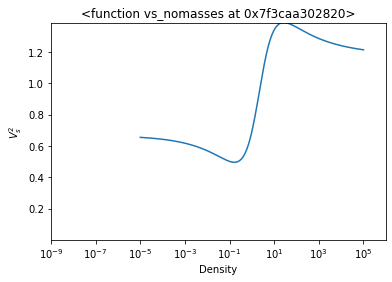

<Figure size 1224x648 with 0 Axes>

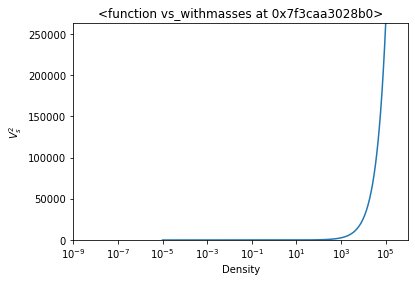

<Figure size 1224x648 with 0 Axes>

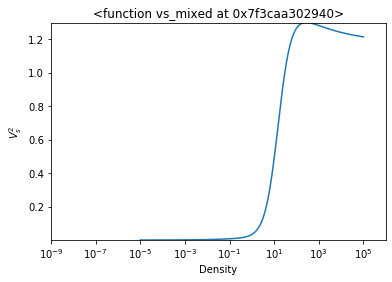

<Figure size 1224x648 with 0 Axes>

In [19]:
for vf in vs_list:
    plotvs(vf, vf)


In [20]:
var("d", "R0", "G", "v", "gamma")
M= M(v)
qq = ((c*d/R0)+sqrt((c*d/R0)^2+4*G*alpha*v^gamma/d))/2
# qq = (v+ sqrt(v^2+4*G*alpha*v^(gamma-3)*c/R0))/2
pretty_print(qq)

NameError: name 'M' is not defined

In [ ]:
qqdif_d=diff(qq,v)

In [ ]:
qqdif_d_gamma = diff(qqdif_d, gamma)

In [ ]:
qqq = qqdif_d_gamma==0
solve(qqdif_d_gamma, gamma)

In [ ]:
solve( solve(qqq, gamma), alpha)